# Face Mask Detection for Covid-19

A real-time system to detect whether the person on the webcam is wearing a mask or not.

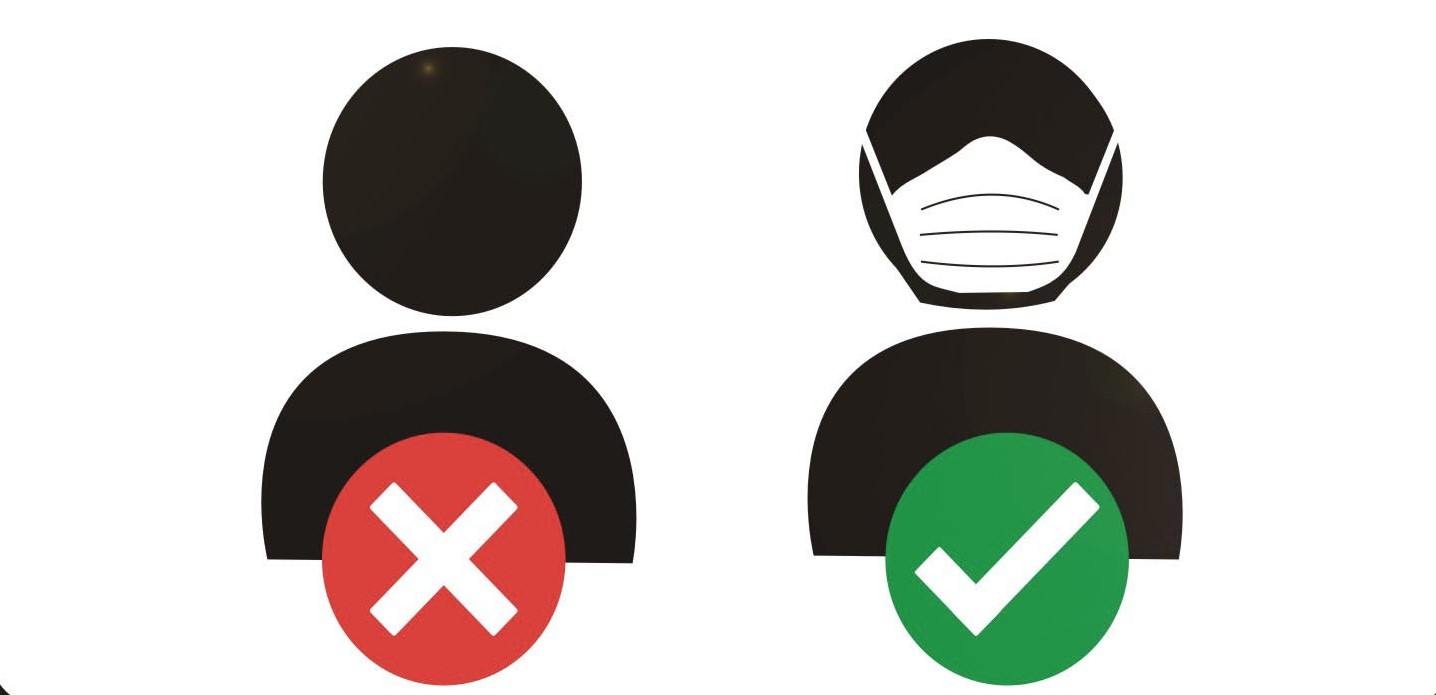

In [7]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import cv2
import numpy as np
from keras.models import load_model

Building the neural network.

In [3]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)), MaxPooling2D(2,2),
    Conv2D(100, (3,3), activation='relu'), MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Loading the train and test data.

In [4]:
TRAINING_DIR = "./drive/MyDrive/Colab Notebooks/Files/Face Mask/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./drive/MyDrive/Colab Notebooks/Files/Face Mask/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


Saving best model after each epoch while training.

In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Training the model.

In [6]:
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - 807s 6s/step - loss: 0.6970 - acc: 0.5772 - val_loss: 0.6455 - val_acc: 0.5155
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
132/132 [==============================] - 20s 150ms/step - loss: 0.4041 - acc: 0.8380 - val_loss: 0.2124 - val_acc: 0.8969
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/10
132/132 [==============================] - 20s 152ms/step - loss: 0.2838 - acc: 0.8928 - val_loss: 0.0986 - val_acc: 0.9691
INFO:tensorflow:Assets written to: model2-003.model/assets
Epoch 4/10
132/132 [==============================] - 20s 153ms/step - loss: 0.2799 - acc: 0.8897 - val_loss: 0.0970 - val_acc: 0.9588
INFO:tensorflow:Assets written to: model2-004.model/assets
Epoch 5/10
132/132 [==============================] - 20s 153ms/step - loss: 0.2267 - acc: 0.9103 - val_loss: 0.1558 - val_acc: 0.9227
Epoch 6/10
132/132 [==============================] - 20s 151ms/step - loss: 0.2208 - acc: 